In [2]:
import torch
import torch.nn as nn
# import torch.nn.functional as F


In [3]:
class Mymodule(nn.Module):
    def __init__(self):
        super.__init__()
        pass

    def forward(self,x):
        return x       



In [4]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_input, num_hidden, num_output) -> None:
        super().__init__()
        self.linear1 = nn.Linear(num_input, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_output)
    def forward(self, x):
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [5]:
sc = SimpleClassifier(2, 4, 1)
sc

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [6]:
for name, param in sc.named_parameters():
    print(f'parametrs {name} in {param.shape}')

parametrs linear1.weight in torch.Size([4, 2])
parametrs linear1.bias in torch.Size([4])
parametrs linear2.weight in torch.Size([1, 4])
parametrs linear2.bias in torch.Size([1])


In [7]:
import torch.utils.data as data
class XORDataset(data.Dataset):
    def __init__(self, size, std=0.1):
        super().__init__()
        self.size = size
        self.std = std
        self.generate_xordata()
    
    def generate_xordata(self):
        data = torch.randint(0,2, size=(self.size, 2), dtype=torch.float32)
        # label = (data.sum(dim=1)==1).to(torch.long)
        label = (torch.einsum('ij->i', data)==1).to(torch.long)
        data += self.std * torch.randn(data.shape)
        self.data = data
        self.label = label
        # print(data, label)
    
    def __len__(self):
        return self.size
    
    def __getitem__(self, idx):
        data_point =  self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label


In [8]:
dataset = XORDataset(200)
dataset[:10]

(tensor([[ 1.0414,  0.0557],
         [ 1.1161,  1.0444],
         [ 0.0033,  0.0692],
         [ 0.1353,  0.0273],
         [ 1.0736, -0.1233],
         [-0.0176, -0.0610],
         [ 1.0120,  1.0856],
         [ 1.0145, -0.0622],
         [-0.0306, -0.1285],
         [-0.0654,  0.8529]]),
 tensor([1, 0, 0, 0, 1, 0, 0, 1, 0, 1]))

In [9]:
data_point = dataset.data.cpu().numpy()
label = dataset.label.cpu().numpy()
data_0 = data_point[label==0]
data_1 = data_point[label==1]

In [10]:
data_0[:,0]

array([ 1.11606693e+00,  3.32913245e-03,  1.35329157e-01, -1.75854471e-02,
        1.01195252e+00, -3.06042433e-02,  7.73348331e-01, -4.30479720e-02,
        1.07286358e+00, -5.92759531e-03,  1.08094394e+00,  1.01923656e+00,
        9.45694864e-01,  2.05851831e-02,  1.11167991e+00,  1.00837922e+00,
        5.04787639e-02,  1.15819502e+00,  1.06330216e+00,  1.12851135e-01,
        1.10275817e+00,  1.49751576e-02, -1.97253212e-01, -1.32333145e-01,
        1.07356548e+00,  1.08744717e+00,  3.76285017e-02,  1.12313938e+00,
        1.08732319e+00,  9.86769378e-01,  1.02329183e+00,  1.00470269e+00,
        1.19384432e+00,  9.79264319e-01,  1.06499147e+00, -5.94552942e-02,
        3.60889845e-02,  1.21517766e+00,  3.01112067e-02,  5.63427322e-02,
        8.46768618e-01, -6.45466745e-02,  1.06827343e+00,  8.48283172e-01,
        1.09797120e+00,  5.14986217e-02,  1.04082465e+00,  8.55012894e-01,
        4.13925052e-02,  1.07534075e+00, -3.39505635e-02,  9.72154856e-01,
       -1.67989537e-01, -

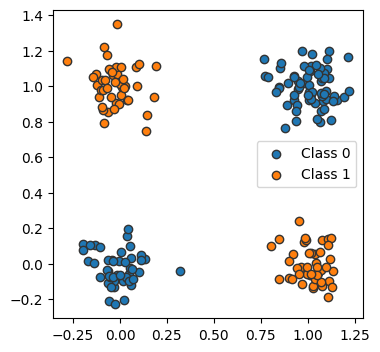

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
plt.legend()

In [12]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)
data_point, data_label = next(iter(data_loader))
data_point, data_label

(tensor([[ 0.8472, -0.0839],
         [ 0.8570,  1.1322],
         [ 1.1350,  0.9184],
         [ 1.0893,  0.9566],
         [-0.0492, -0.1300],
         [ 0.0028,  1.1098],
         [-0.1066,  0.0931],
         [-0.0637, -0.1090]]),
 tensor([1, 0, 0, 0, 0, 1, 0, 0]))

In [13]:
loss_module = nn.BCEWithLogitsLoss(reduction='none')
optim = torch.optim.SGD(sc.parameters(), lr=0.1)

Training


In [14]:
import torch.utils.data as data
train_dataset = XORDataset(2500)
train_dataLoader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)
data_point, data_label = next(iter(train_dataLoader))
print(data_point, data_label)

tensor([[ 0.9945,  0.0300],
        [ 0.0884, -0.2115],
        [ 0.8879,  1.0318],
        [ 0.8497,  0.0394],
        [ 0.9583,  0.9057],
        [ 0.0723,  0.9564],
        [ 0.9347,  0.0740],
        [-0.0852, -0.0420],
        [ 0.0457,  1.0335],
        [ 0.8802,  0.9249],
        [ 0.9165,  1.0530],
        [ 0.0014, -0.0714],
        [ 0.7561,  1.0813],
        [ 1.0700, -0.0505],
        [ 1.0609, -0.1214],
        [ 0.0704, -0.1494],
        [-0.1099,  1.0338],
        [ 1.0103,  1.0358],
        [ 1.0007,  0.9530],
        [ 1.0904, -0.0236],
        [ 0.1169,  0.0894],
        [ 1.1157,  0.1625],
        [-0.0909,  0.9440],
        [ 1.1520,  0.0040],
        [ 0.0477,  0.0601],
        [ 0.0613, -0.0667],
        [-0.0350,  1.0054],
        [ 0.9060,  0.0678],
        [ 0.0757,  1.0340],
        [ 0.9971,  0.8979],
        [ 0.0547, -0.0606],
        [ 1.2099,  1.0180],
        [ 0.0135, -0.0745],
        [ 1.1047, -0.1518],
        [ 0.0403, -0.1705],
        [ 1.0862,  0

In [15]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
sc.to(device)
device

device(type='cuda')

In [16]:
def train_model(model, data_loader, optimizer, loss_module, num_epochs=100):
    model.train()

    for epoch in (range(num_epochs)):
        for data_input, data_label in data_loader:
            data_input = data_input.to(device)
            data_label = data_label.to(device)
            preds = model(data_input)
            # print(preds.shape)
            preds = torch.einsum('ij->i', preds)
            # print(preds.shape)
            loss = loss_module(preds, data_label.float())
            # print(loss.shape)
            # zero_grad
            optim.zero_grad()
            # perfrom gradient and nachprop
            loss.backward()
            # update grads
            optim.step()


In [17]:
import torch.utils.data as data
def create_dataloader(num_data, batch_size, shuffle):
    train_dataset = XORDataset(num_data)
    train_dataLoader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
    # data_point, data_label = next(iter(train_dataLoader))
    return train_dataLoader

In [18]:
for name, param in sc.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


In [19]:
# sample training run
sc = SimpleClassifier(2,4,1).to(device)
# this will return loss corresponning to each record in batch 
loss_module = nn.BCEWithLogitsLoss(reduction='none')
# this will reduce the loss by sum
loss_module = nn.BCEWithLogitsLoss(reduction='mean')
optim = torch.optim.SGD(sc.parameters(), lr=0.1)
train_dataLoader = create_dataloader(2500, 128, True)
print(f'num of batches:: {len(train_dataLoader)}')


num of batches:: 20


In [26]:
train_model(sc, create_dataloader(2500, 128, True), optim, loss_module, 30)

In [28]:
sc_state_dict = sc.state_dict()
torch.save(sc_state_dict, "simpleclassifier.tar")

Eval

In [27]:
test_dataloader = create_dataloader(500, 128, True)
len(test_dataloader)

4

In [29]:
def eval_model(model, data_loader):
    model.eval()
    true_pred, num_pred = 0, 0
    with torch.no_grad():
        for data_input, data_label in data_loader:
            data_input, data_label = data_input.to(device), data_label.to(device)
            preds = model(data_input)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)
            pred_label = (preds>0.5).to(torch.long)
            true_pred += (pred_label==data_label).sum()
            print(true_pred)
            num_pred += data_label.shape[0]
            print(num_pred)
            # print(pred_label.shape)
            # print(data_label.shape)
    acc = true_pred/num_pred
    print(f'accuracy:: {acc}')

In [30]:
eval_model(sc, test_dataloader)

tensor(128, device='cuda:0')
128
tensor(256, device='cuda:0')
256
tensor(384, device='cuda:0')
384
tensor(500, device='cuda:0')
500
accuracy:: 1.0


In [31]:
sc.state_dict()

OrderedDict([('linear1.weight',
              tensor([[ 0.9464,  0.9625],
                      [-2.8222,  2.5893],
                      [ 0.7809, -0.9307],
                      [ 2.2222, -2.5380]], device='cuda:0')),
             ('linear1.bias',
              tensor([ 0.3749, -1.2432, -0.3460, -1.0669], device='cuda:0')),
             ('linear2.weight',
              tensor([[1.5257, 3.5537, 0.7039, 3.1434]], device='cuda:0')),
             ('linear2.bias', tensor([1.9687], device='cuda:0'))])

In [34]:
from matplotlib.colors import to_rgba
   
c0 = torch.Tensor(to_rgba("C0")).to(device)
c1 = torch.Tensor(to_rgba("C1")).to(device)
print(c0)

tensor([0.1216, 0.4667, 0.7059, 1.0000], device='cuda:0')


In [41]:
x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
print(x1.shape)


torch.Size([200])


In [42]:
xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  
print(xx1.shape)# Meshgrid function as in numpy
model_inputs = torch.stack([xx1, xx2], dim=-1)
model_inputs.shape

torch.Size([200, 200])


torch.Size([200, 200, 2])

In [44]:
x = torch.arange(0, 3)
y = torch.arange(4, 7)
print(x,y)
# Create meshgrid
X, Y = torch.meshgrid(x, y)

# Print the result
print("X:")
print(X)
print("Y:")
print(Y)

tensor([0, 1, 2]) tensor([4, 5, 6])
X:
tensor([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]])
Y:
tensor([[4, 5, 6],
        [4, 5, 6],
        [4, 5, 6]])


In [50]:
tt = torch.stack([X, Y], dim=-1)
tt

tensor([[[0, 4],
         [0, 5],
         [0, 6]],

        [[1, 4],
         [1, 5],
         [1, 6]],

        [[2, 4],
         [2, 5],
         [2, 6]]])

In [51]:
tt.shape

torch.Size([3, 3, 2])

In [54]:
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(sc, dataset.data, dataset.label)
plt.show()

NameError: name 'model' is not defined

In [53]:
def train_model_with_logger(model, optimizer, data_loader, loss_module, val_dataset, num_epochs=100, logging_dir='runs/our_experiment'):
    # Create TensorBoard logger
    writer = SummaryWriter(logging_dir)
    model_plotted = False

    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        epoch_loss = 0.0
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # For the very first batch, we visualize the computation graph in TensorBoard
            if not model_plotted:
                writer.add_graph(model, data_inputs)
                model_plotted = True

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

            ## Step 6: Take the running average of the loss
            epoch_loss += loss.item()

        # Add average loss to TensorBoard
        epoch_loss /= len(data_loader)
        writer.add_scalar('training_loss',
                          epoch_loss,
                          global_step = epoch + 1)

        # Visualize prediction and add figure to TensorBoard
        # Since matplotlib figures can be slow in rendering, we only do it every 10th epoch
        if (epoch + 1) % 10 == 0:
            fig = visualize_classification(model, val_dataset.data, val_dataset.label)
            writer.add_figure('predictions',
                              fig,
                              global_step = epoch + 1)

    writer.close()